<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/Mask_Generation_Patch_Extraction_KOHI_Hands_On_Computational_Histopathology_(20_10_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo pip install setuptools==45

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.8/583.8 KB 38.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
!sudo apt-get install --yes openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (122 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debcon

In [ ]:
!sudo -H pip install openslide-python

     |████████████████████████████████| 317kB 7.5MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.1.2-cp37-cp37m-linux_x86_64.whl size=27651 sha256=4588090ade082bc071b471b0e13d1541ccd978ae3acfb1093e2e2723d58a9ac0
  Stored in directory: /root/.cache/pip/wheels/6b/55/74/ba9d3dcc2c5c0f1282e08bae70df0ed57b496fb6b5c8f1adc9
Successfully built openslide-python


In [1]:
import openslide
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import os
import random
import shutil
import scipy.misc
import scipy.ndimage
from skimage import io
from skimage import morphology
from skimage import measure

from lxml import etree
import math
import glob
from PIL import Image
import imutils


ModuleNotFoundError: ignored

https://drive.google.com/drive/folders/1ZuNL4KHh2sAQy2GLUuF6XlWeHL_aNhwQ?usp=sharing

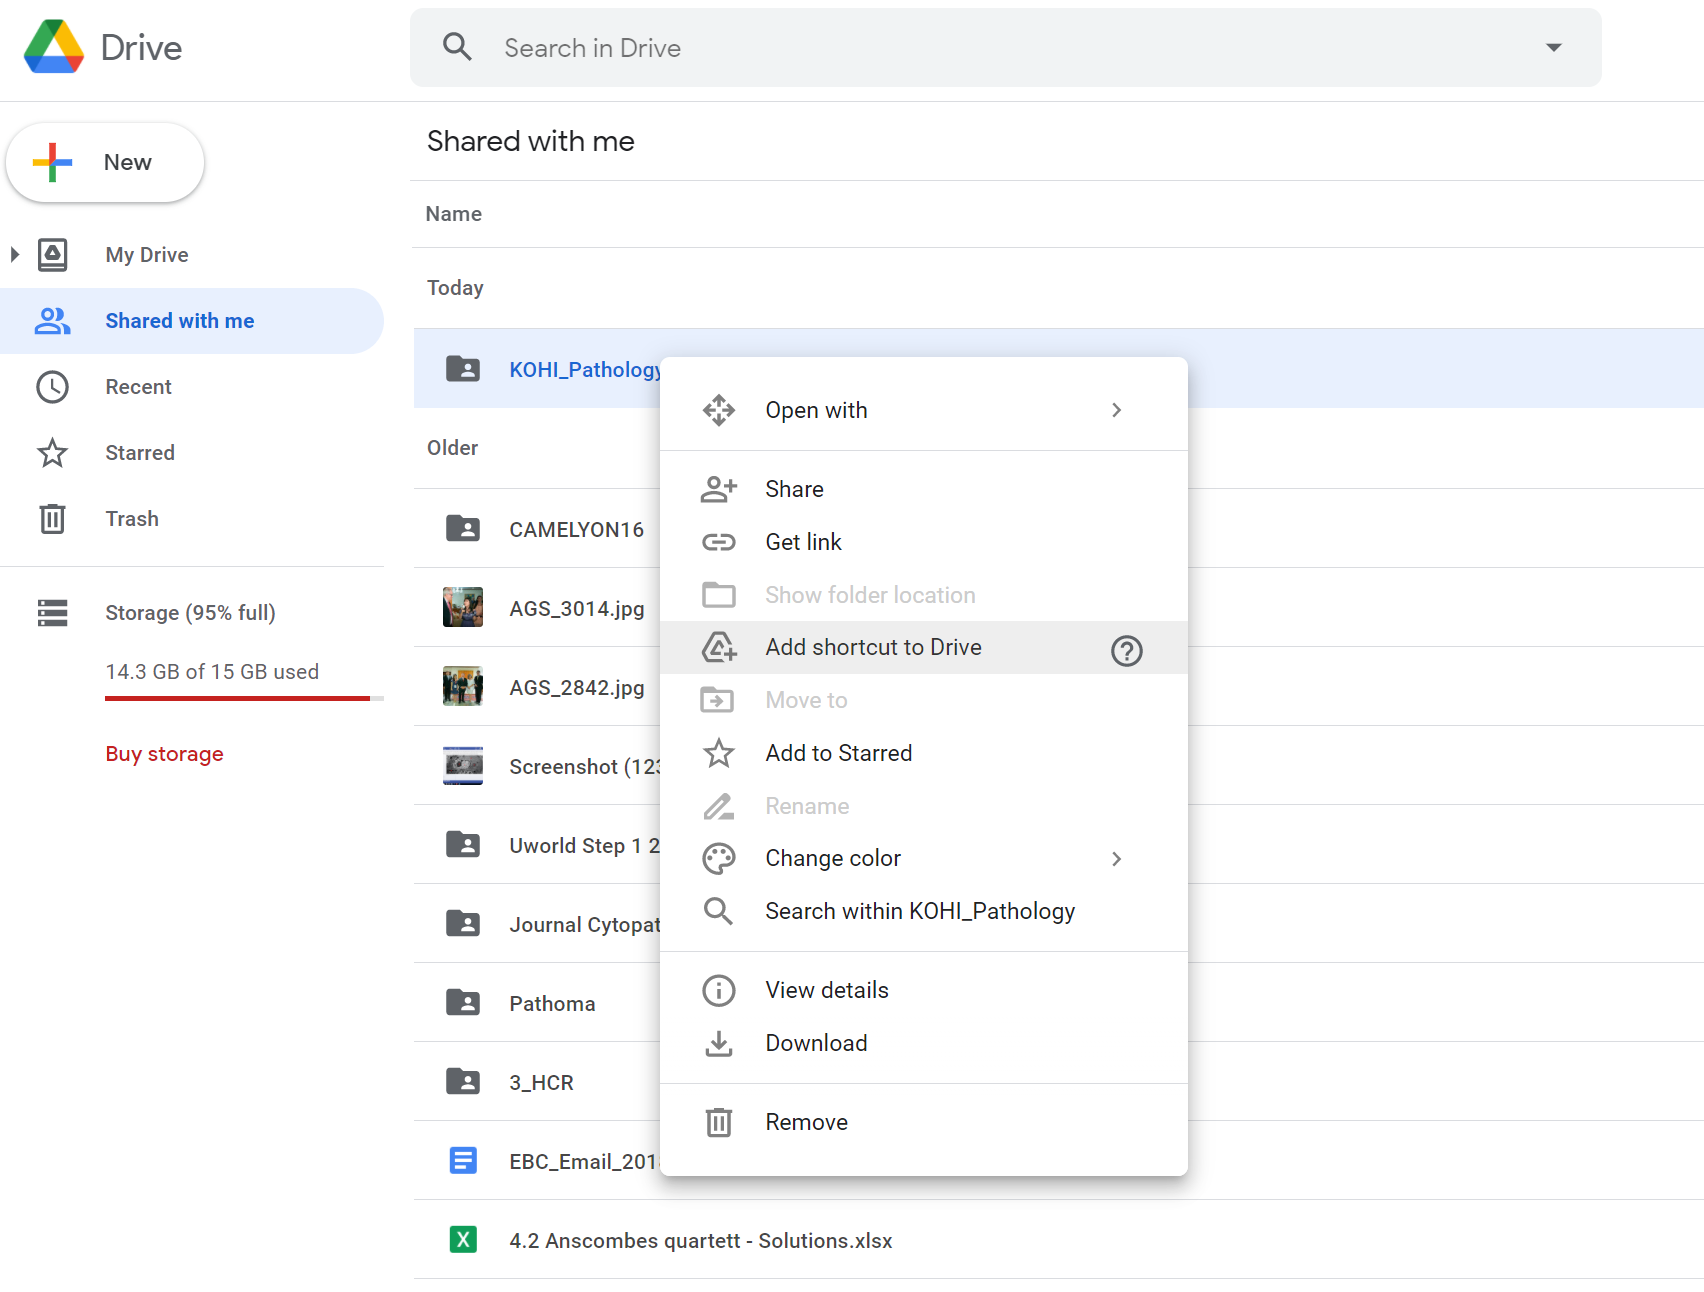

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/'My Drive'/'KOHI_Pathology'

/content/drive/My Drive/KOHI_Pathology


In [ ]:
!pwd

/content/drive/My Drive/KOHI_Pathology


In [ ]:
# copy & paste directory into path_common 
path_common = '/content/drive/My Drive/KOHI_Pathology'

In [ ]:
path_tumor_WSI = os.path.join(path_common , 'WSI/tumor_085.tif')
path_out_tissue_mask = os.path.join(path_common , 'tissue_mask/')

In [ ]:
# comparing WSI dimensions by resolution level

org_slide = openslide.OpenSlide(path_tumor_WSI) # original tif load
 
dims_level_0 = org_slide.level_dimensions[0]
print('level 0 dimensions (x,y):        ', dims_level_0)
print('*'*50)
dims_level_1 = org_slide.level_dimensions[1]
print('level 1 dimensions (x,y):        ', dims_level_1)
print('level 0 dimensions divided by 2 : ', int(dims_level_0[0]/2), int(dims_level_0[1]/2))
print('*'*50)

dims_level_2 = org_slide.level_dimensions[2]
print('level 2 dimensions (x,y):        ', dims_level_2)
print('level 0 dimensions divided by 4 : ', int(dims_level_0[0]/4), int(dims_level_0[1]/4))
print('*'*50)

dims_level_3 = org_slide.level_dimensions[3]
print('level 3 dimensions (x,y):        ', dims_level_3)
print('level 0 dimensions divided by 8 : ', int(dims_level_0[0]/8), int(dims_level_0[1]/8))
print('*'*50)

dims_level_4 = org_slide.level_dimensions[4]
print('level 4 dimensions (x,y):        ', dims_level_4)
print('level 0 dimensions divided by 16 : ', int(dims_level_0[0]/16), int(dims_level_0[1]/16))
print('*'*50)

dims_level_5 = org_slide.level_dimensions[5]
print('level 5 dimensions (x,y):        ', dims_level_5)
print('level 0 dimensions divided by 32 : ', int(dims_level_0[0]/32), int(dims_level_0[1]/32))
print('*'*50)

dims_level_6 = org_slide.level_dimensions[6]
print('level 6 dimensions (x,y):        ', dims_level_6)
print('level 0 dimensions divided by 64 : ', int(dims_level_0[0]/64), int(dims_level_0[1]/64))
print('*'*50)

dims_level_7 = org_slide.level_dimensions[7]
print('level 7 dimensions (x,y):        ', dims_level_7)
print('level 0 dimensions divided by 128 : ', int(dims_level_0[0]/128), int(dims_level_0[1]/128))
print('*'*50)

dims_level_8 = org_slide.level_dimensions[8]
print('level 8 dimensions (x,y):        ', dims_level_8)
print('level 0 dimensions divided by 256 : ', int(dims_level_0[0]/256), int(dims_level_0[1]/256))


level 0 dimensions (x,y):         (122880, 89600)
**************************************************
level 1 dimensions (x,y):         (61440, 44800)
level 0 dimensions divided by 2 :  61440 44800
**************************************************
level 2 dimensions (x,y):         (30720, 22400)
level 0 dimensions divided by 4 :  30720 22400
**************************************************
level 3 dimensions (x,y):         (15360, 11200)
level 0 dimensions divided by 8 :  15360 11200
**************************************************
level 4 dimensions (x,y):         (7680, 5600)
level 0 dimensions divided by 16 :  7680 5600
**************************************************
level 5 dimensions (x,y):         (3840, 2800)
level 0 dimensions divided by 32 :  3840 2800
**************************************************
level 6 dimensions (x,y):         (1920, 1400)
level 0 dimensions divided by 64 :  1920 1400
**************************************************
level 7 dimensions (x,y): 

(7680, 5600)
7680 5600


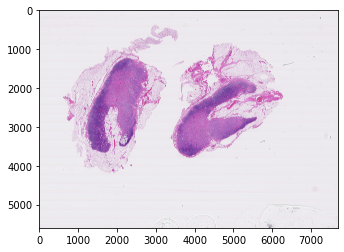

In [ ]:
# visualize WSI at level 4

LEVEL_OPENSLIDE = 4   # set resolution level (level 4 =  1/16 resolution)
dims_level_4 = org_slide.level_dimensions[LEVEL_OPENSLIDE]
print(dims_level_4)

WSI_array = np.array(org_slide.read_region([0, 0],LEVEL_OPENSLIDE, [dims_level_4[0], dims_level_4[1]]))[:,:,0:3]
print(WSI_array.shape[1],WSI_array.shape[0])

plt.imshow(WSI_array)
plt.show()

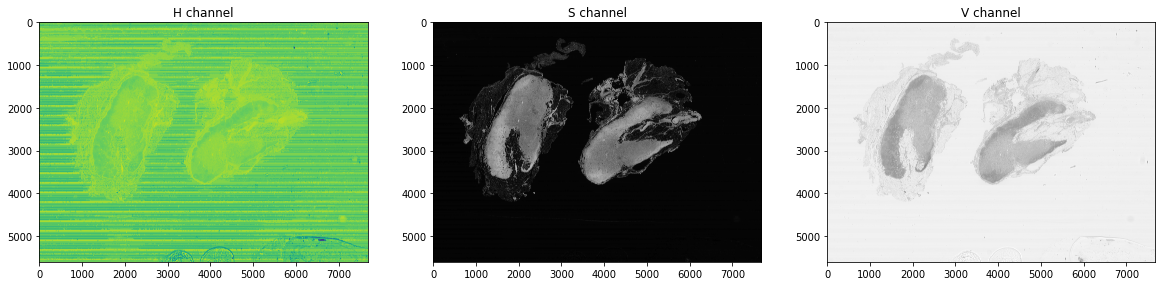

In [ ]:
# comparing h,s,v channels images and values

WSI_hsv = cv2.cvtColor(WSI_array, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(WSI_hsv)

plt.figure(figsize=(20, 20))
plt.subplot(131)

plt.imshow(WSI_hsv[:,:,0])
plt.title('H channel')

plt.subplot(132)
plt.imshow(WSI_hsv[:,:,1], 'gray')
plt.title('S channel')

plt.subplot(133)
plt.imshow(WSI_hsv[:,:,2], 'gray')
plt.title('V channel')


plt.show()

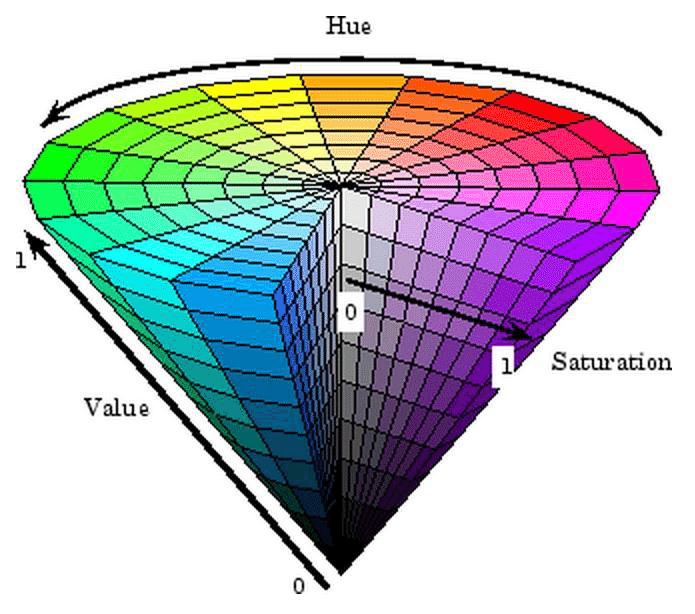

In [ ]:
# H channel

np.unique(WSI_hsv[:,:,0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  30,  34,  35,  36,  38,  39,  40,  42,  43,  45,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  60,  62,  63,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179], dtype=uint8)

In [ ]:
# S channel

np.unique(WSI_hsv[:,:,1])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# V channel

np.unique(WSI_hsv[:,:,2])

array([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

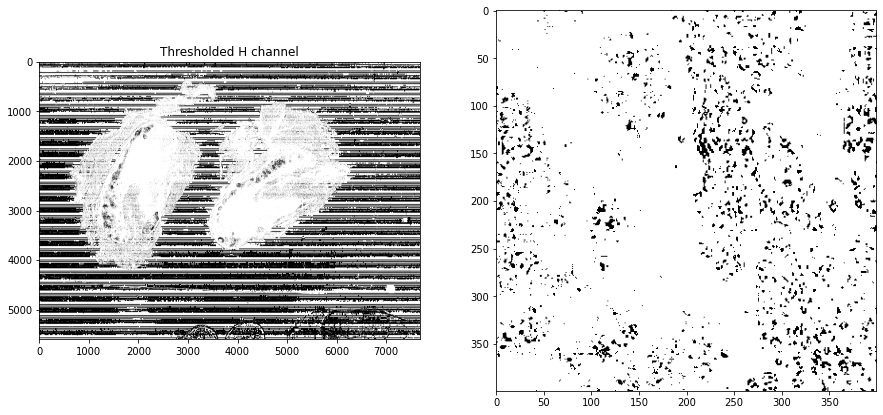

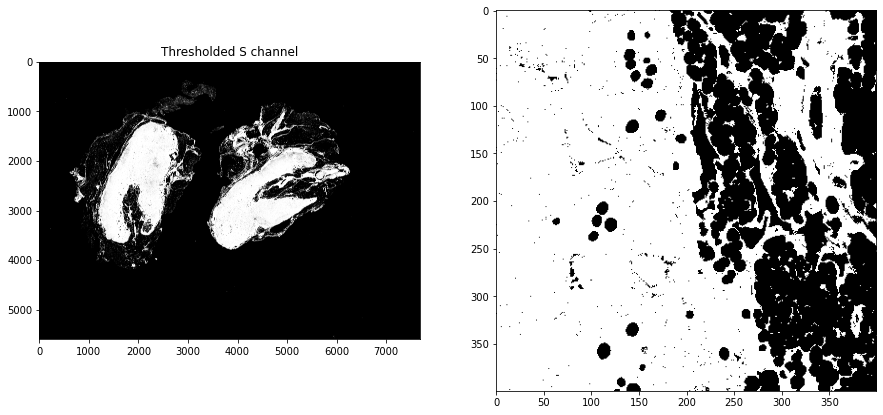

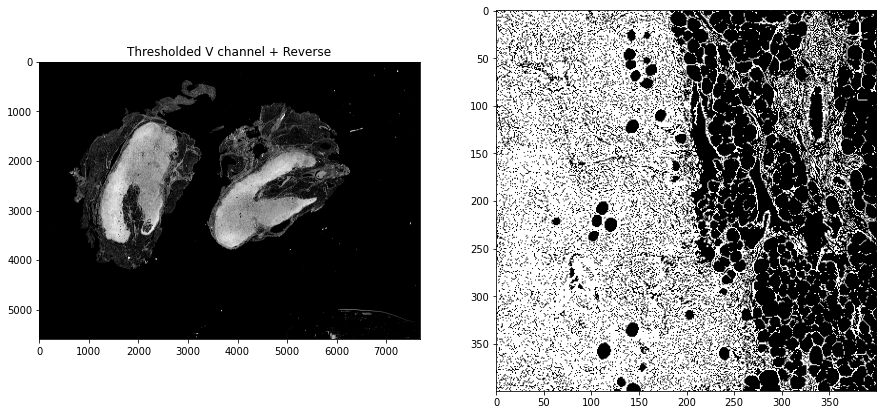

In [ ]:
# Otsu's thresholding to get optimal threshold values for each channel

_,mask_h = cv2.threshold(h,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(mask_h, 'gray')
plt.title('Thresholded H channel')

plt.subplot(122)
plt.imshow(mask_h[3000:3400,1500:1900], 'gray')
plt.show()


_,mask_s = cv2.threshold(s,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(mask_s, 'gray')
plt.title('Thresholded S channel')

plt.subplot(122)
plt.imshow(mask_s[3000:3400,1500:1900], 'gray')
plt.show()


_,mask_v = cv2.threshold(v,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(cv2.bitwise_not(mask_v), 'gray')
plt.title('Thresholded V channel + Reverse')

plt.subplot(122)
plt.imshow(cv2.bitwise_not(mask_v)[3000:3400,1500:1900], 'gray')
plt.show()


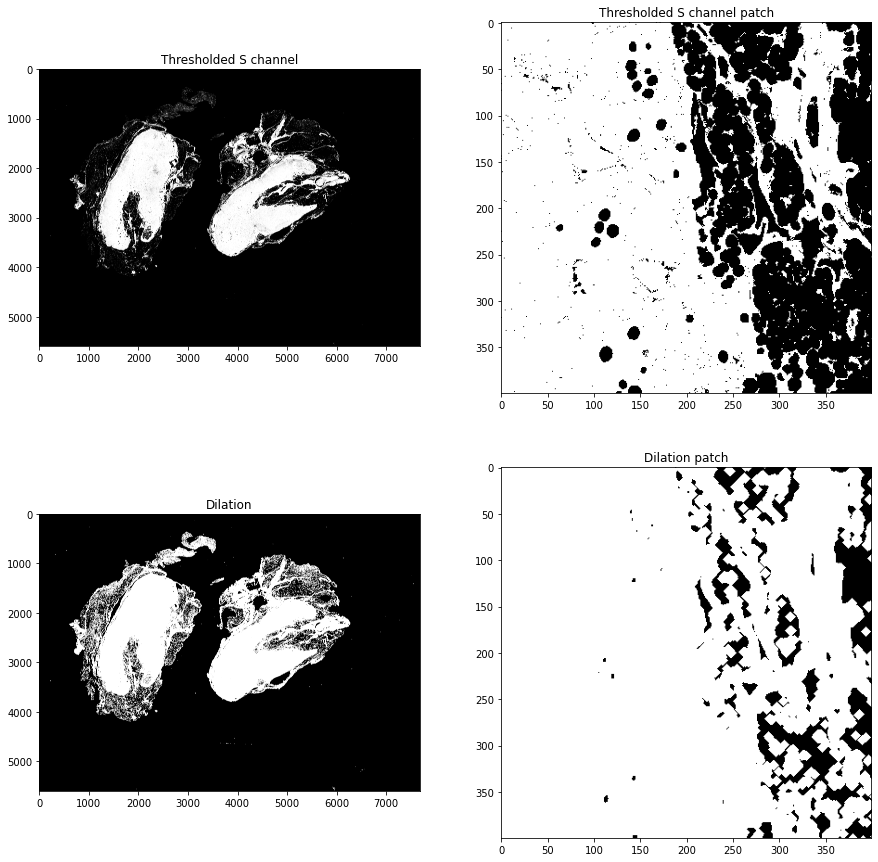

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(mask_s, 'gray')
plt.title('Thresholded S channel')

mask_dilation = scipy.ndimage.morphology.binary_dilation(mask_s, structure=None, iterations=5, mask=None, output=None, border_value=0, origin=0, brute_force=False)

plt.subplot(222)
plt.imshow(mask_s[3000:3400,1500:1900], 'gray')
plt.title('Thresholded S channel patch')

plt.subplot(223)
plt.imshow(mask_dilation, 'gray')
plt.title('Dilation')

plt.subplot(224)
plt.imshow(mask_dilation[3000:3400,1500:1900], 'gray')
plt.title('Dilation patch')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  # Remove the CWD from sys.path while we load stuff.


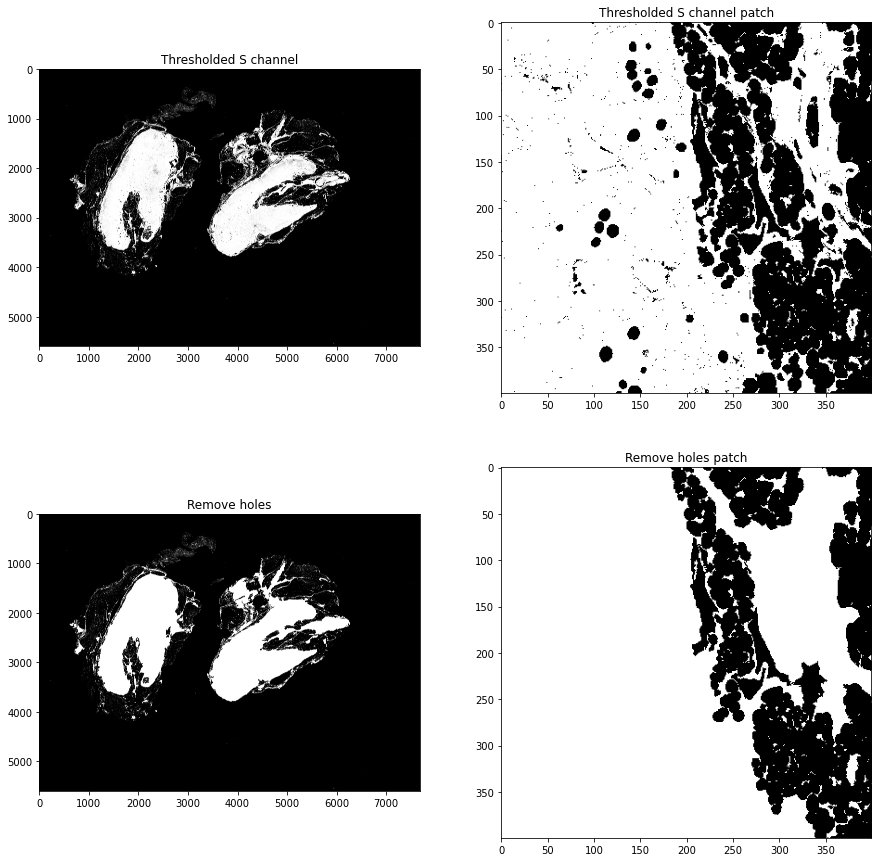

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(mask_s, 'gray')
plt.title('Thresholded S channel')

plt.subplot(222)
plt.imshow(mask_s[3000:3400,1500:1900], 'gray')
plt.title('Thresholded S channel patch')

remove_holes = morphology.remove_small_holes(mask_s, area_threshold=10000)
remove_holes = np.array(remove_holes).astype('uint8') * 255

plt.subplot(223)
plt.imshow(remove_holes, 'gray')
plt.title('Remove holes')

plt.subplot(224)
plt.imshow(remove_holes[3000:3400,1500:1900], 'gray')
plt.title('Remove holes patch')
plt.show()

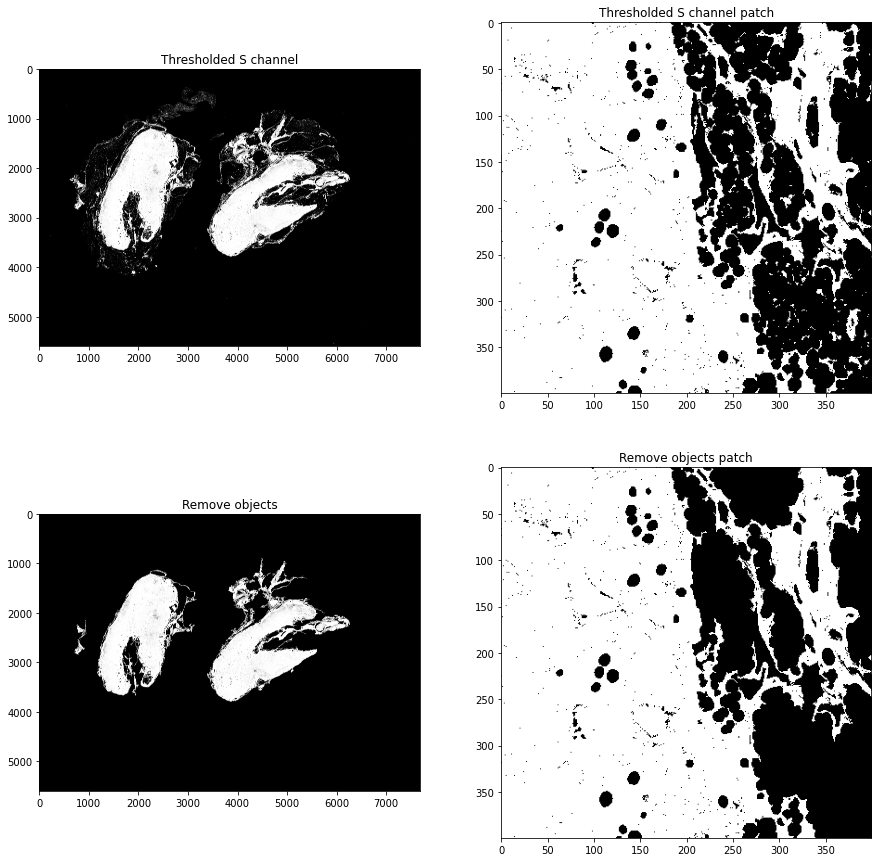

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(mask_s, 'gray')
plt.title('Thresholded S channel')

plt.subplot(222)
plt.imshow(mask_s[3000:3400,1500:1900], 'gray')
plt.title('Thresholded S channel patch')

remove_obj = morphology.remove_small_objects(measure.label(mask_s), min_size=10000)
remove_obj[np.where(remove_obj!=0)] = 255
plt.subplot(223)
plt.imshow(remove_obj, 'gray')
plt.title('Remove objects')

plt.subplot(224)
plt.imshow(remove_obj[3000:3400,1500:1900], 'gray')
plt.title('Remove objects patch')
plt.show()

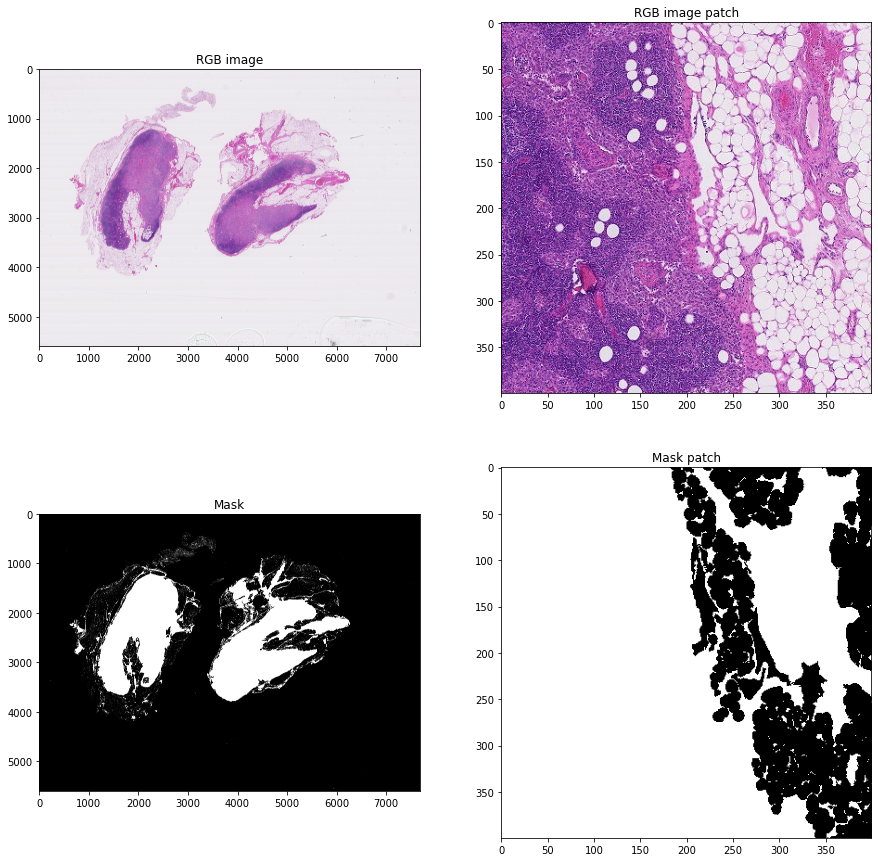

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.imshow(WSI_array)
plt.title('RGB image')

plt.subplot(222)
plt.imshow(WSI_array[3000:3400,1500:1900])
plt.title('RGB image patch')


plt.subplot(223)
plt.imshow(remove_holes,'gray')
plt.title('Mask')

plt.subplot(224)
plt.imshow(remove_holes[3000:3400,1500:1900],'gray')
plt.title('Mask patch')
plt.show()

In [ ]:
def make_tumor_mask(WSI_path,XML_path, level2extract, multiple):
  
    tree = etree.parse(XML_path)
    root = tree.getroot()
    sub_root = root[0]
    total_points_org = []
    total_points = []

    for i in range(len(sub_root)):
        xy_point_org = []
        xy_point = []
        
        for child in sub_root[i].iter("Coordinate"):
            coordinates = child.attrib
            x = (float(coordinates.get('X')))
            y = (float(coordinates.get('Y')))
            xy_point_org.append((x,y))
            xy_point.append((x/multiple,y/multiple))

        total_points_org.append(xy_point_org)   
        total_points.append(xy_point)   
      
    image = openslide.OpenSlide (WSI_path)
    w,h = image.level_dimensions[level2extract]
    
    mask = np.zeros((h,w),dtype=np.uint8)
    
    for i in range(len(total_points)):
        mask_pts = np.array(total_points[i]).reshape((-1, 1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [mask_pts], [255])
               
    return mask, total_points_org


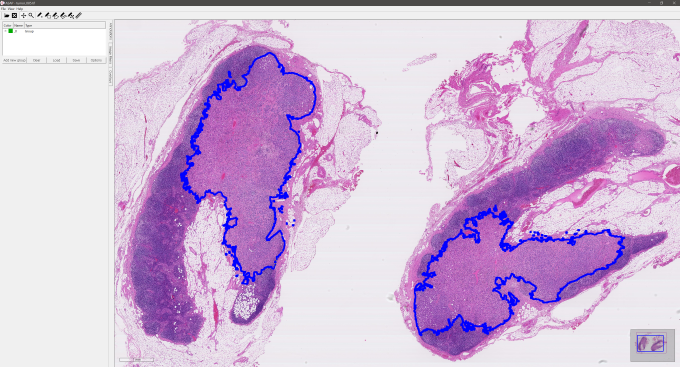

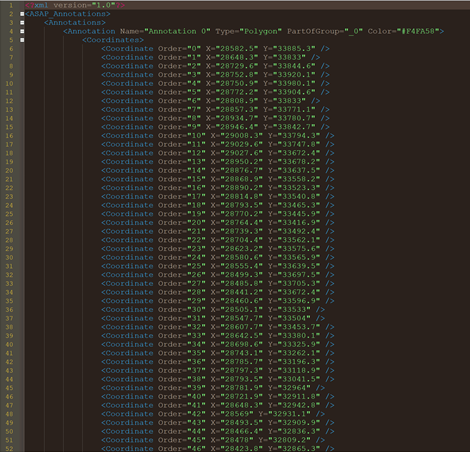

In [ ]:
XML_path = glob.glob(path_common+'/tumor_mask/*.xml')

In [ ]:
XML_path

['/content/drive/My Drive/KOHI_Pathology/tumor_mask/tumor_085.xml']

In [ ]:
WSI_path = glob.glob(path_common+'/WSI/tumor*.tif')

In [ ]:
WSI_path

['/content/drive/My Drive/KOHI_Pathology/WSI/tumor_085.tif']

In [ ]:
level2extract = 4
multiple = org_slide.level_dimensions[0][0]/org_slide.level_dimensions[level2extract][0]
print(multiple)

16.0


In [ ]:
# create tumor mask from xml format annotation file

mask_tumor, total_points = make_tumor_mask(WSI_path[0],XML_path[0], level2extract, multiple)

In [ ]:
# verify mask value

np.max(mask_tumor)

255

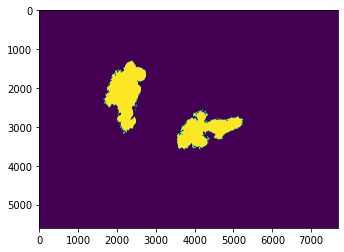

In [ ]:
# verify mask image

plt.imshow(mask_tumor)
plt.show()

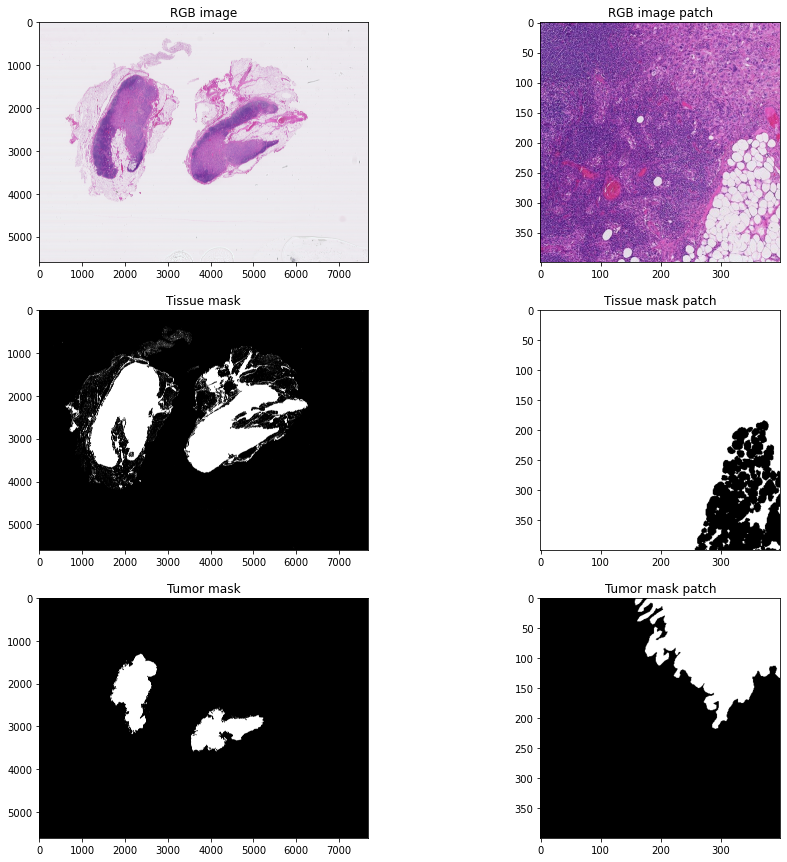

In [ ]:
# compare RGB image, tissue mask and tumor mask

plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.imshow(WSI_array)
plt.title('RGB image')

plt.subplot(322)
plt.imshow(WSI_array[2300:2700,1500:1900])
plt.title('RGB image patch')


plt.subplot(323)
plt.imshow(remove_holes,'gray')
plt.title('Tissue mask')

plt.subplot(324)
plt.imshow(remove_holes[2300:2700,1500:1900],'gray')
plt.title('Tissue mask patch')


plt.subplot(325)
plt.imshow(mask_tumor,'gray')
plt.title('Tumor mask')

plt.subplot(326)
plt.imshow(mask_tumor[2300:2700,1500:1900],'gray')
plt.title('Tumor mask patch')
plt.show()

# Tumor patch extraction

In [ ]:
def get_ratio_mask(patch):
       
    h_,w_ = patch.shape[0], patch.shape[1]
    n_total = h_*w_
    n_cell  = np.count_nonzero(patch)
    
    if (n_cell != 0) :
        return n_cell*1.0/n_total*1.0
    
    else :
        return 0

In [ ]:
def make_combinations(mask_points):
    return sorted(list(set([(x, y) for points_group in mask_points for x, _ in points_group for _, y in points_group])))

In [ ]:
size_patch_level0 = 512*2
size_patch_over_level0 = size_patch_level0*2

patient = XML_path[0].split('/')[-1].split('.')[0]
print('extracting patches from: ' , patient)

org_slide = openslide.OpenSlide(WSI_path[0])
dims = org_slide.level_dimensions[0]

level2extract = 4
multiple = float(dims[0]/org_slide.level_dimensions[level2extract][0])
size_patch_level4 = int(size_patch_level0/multiple)
size_patch_over_level4 = int(size_patch_over_level0/multiple)

tissue_mask = cv2.imread(path_common+'/tissue_mask/'+patient+'_th_tumor.png')
tumor_mask, tumor_mask_points = make_tumor_mask(WSI_path[0],XML_path[0], level2extract, multiple)

combinations_total = make_combinations(tumor_mask_points)

print('len(combinations_total): ', len(combinations_total))

extracting patches from:  tumor_085
len(combinations_total):  18510779


random coordinates (x,y): (64455.7, 55821.3)


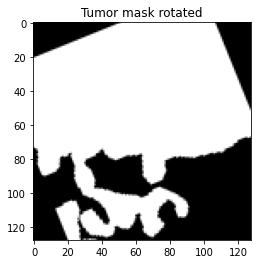

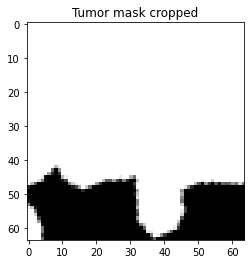

tumor ratio inside patch is over 0.75 with value:  0.8046875
saving image in:  /content/drive/My Drive/KOHI_Pathology/tumor_patches/image_tumor/0.png


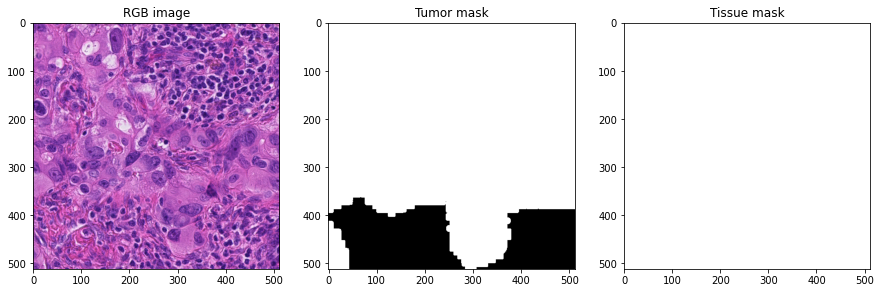

random coordinates (x,y): (38699.2, 28904.7)


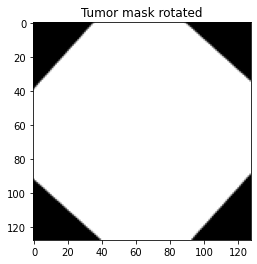

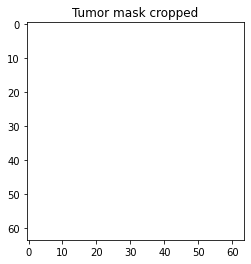

tumor ratio inside patch is over 0.75 with value:  1.0
saving image in:  /content/drive/My Drive/KOHI_Pathology/tumor_patches/image_tumor/1.png


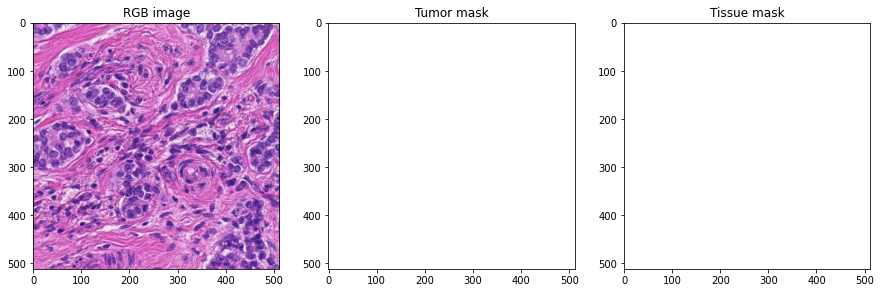

random coordinates (x,y): (60383.3, 43886.2)


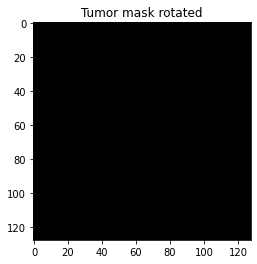

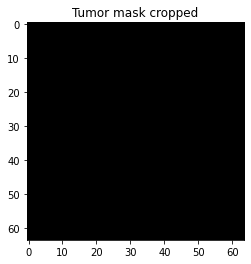

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (58035.8, 51334.1)


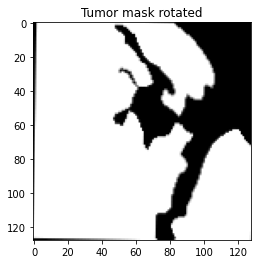

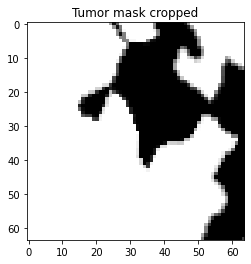

tumor ratio inside patch is over 0.75 with value:  0.75439453125
saving image in:  /content/drive/My Drive/KOHI_Pathology/tumor_patches/image_tumor/2.png


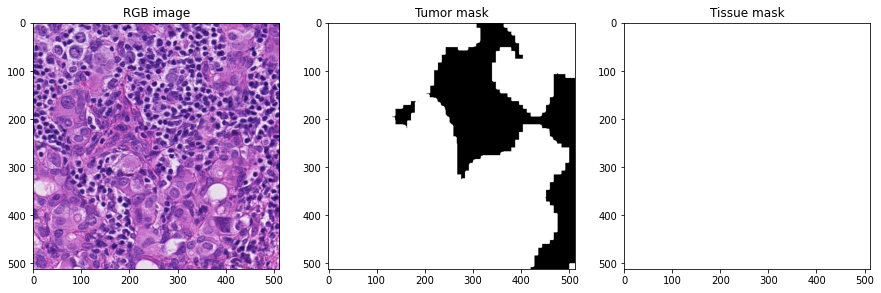

random coordinates (x,y): (27849.0, 22361.6)


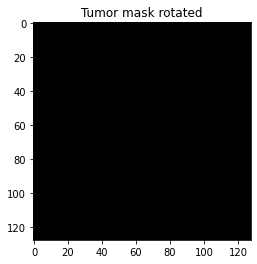

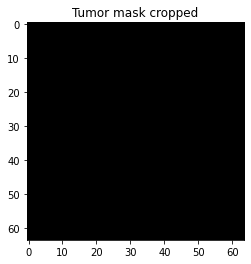

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (31865.3, 48838.6)


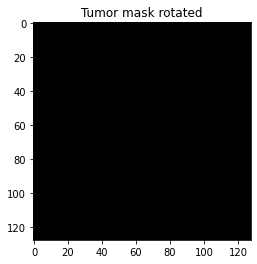

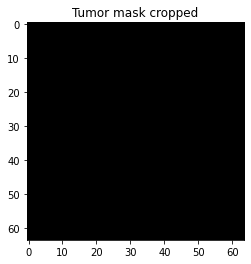

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (63074.0, 56694.6)


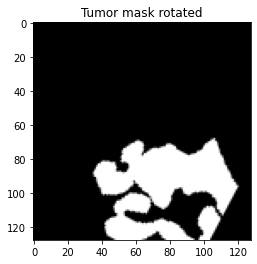

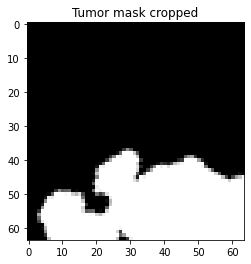

tumor ratio inside patch is less than 0.75 with value:  0.29443359375
random coordinates (x,y): (57400.6, 44713.3)


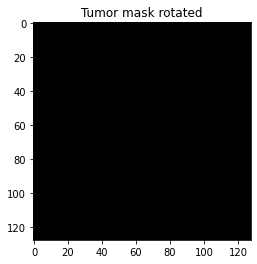

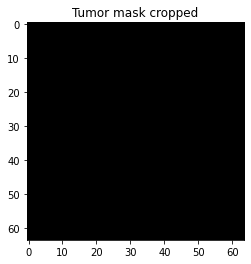

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (67647.3, 56132.7)


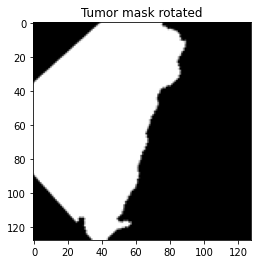

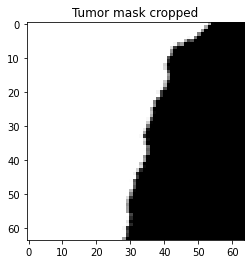

tumor ratio inside patch is less than 0.75 with value:  0.58544921875
random coordinates (x,y): (56936.4, 44652.0)


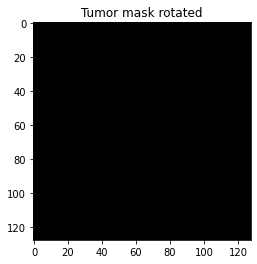

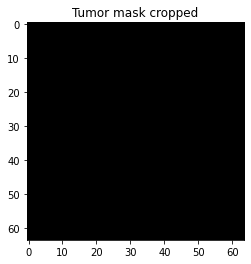

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (83189.0, 55962.9)


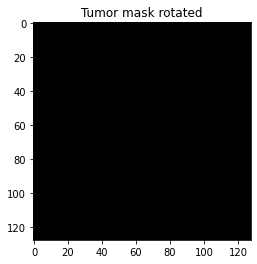

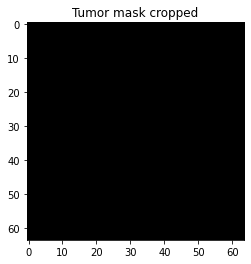

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (27802.6, 28309.6)


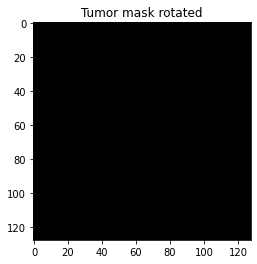

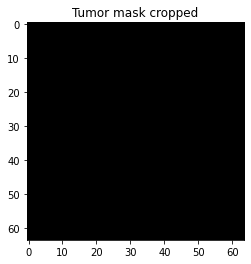

tumor ratio inside patch is less than 0.75 with value:  0
random coordinates (x,y): (35232.4, 27531.6)


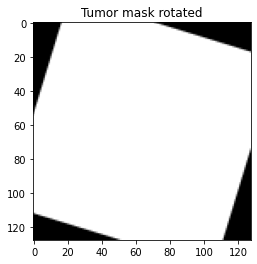

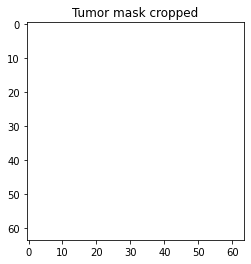

tumor ratio inside patch is over 0.75 with value:  1.0
saving image in:  /content/drive/My Drive/KOHI_Pathology/tumor_patches/image_tumor/3.png


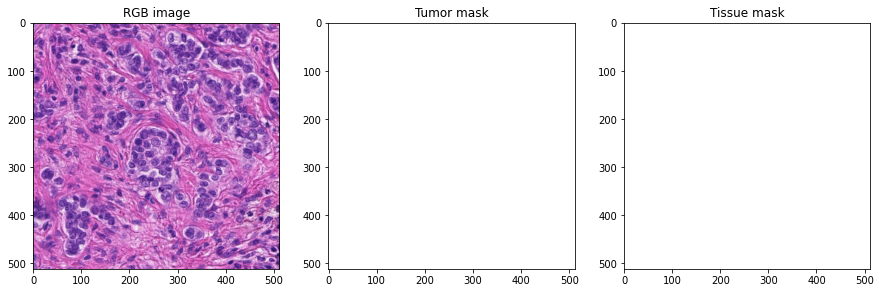

random coordinates (x,y): (66695.8, 44165.3)


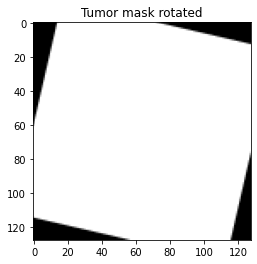

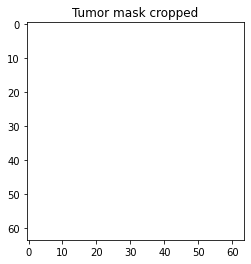

tumor ratio inside patch is over 0.75 with value:  1.0
saving image in:  /content/drive/My Drive/KOHI_Pathology/tumor_patches/image_tumor/4.png


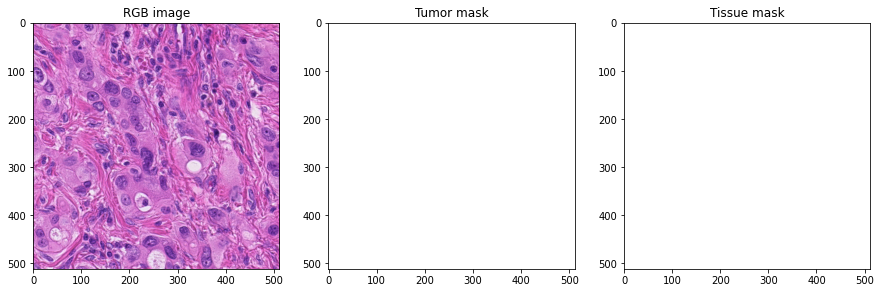

In [ ]:
patch_objective = 5
patch_count = 0

while patch_count < patch_objective :

    rand_coord = random.choice(combinations_total)
    print('random coordinates (x,y):', rand_coord)

    start_y_level0 = int(rand_coord[1] - (size_patch_over_level0/2))
    start_x_level0 = int(rand_coord[0] - (size_patch_over_level0/2))
    
    start_y_level4 = int(start_y_level0/multiple)
    start_x_level4 = int(start_x_level0/multiple)

    tumor_mask_patch = tumor_mask[start_y_level4:int(start_y_level4+size_patch_over_level4),
                                  start_x_level4:int(start_x_level4+size_patch_over_level4)]
    tissue_mask_patch = tissue_mask[start_y_level4:int(start_y_level4+size_patch_over_level4),
                                    start_x_level4:int(start_x_level4+size_patch_over_level4)]
    image_patch = np.array(org_slide.read_region([start_x_level0,start_y_level0],0,
                                                 [size_patch_over_level0,size_patch_over_level0]))[:,:,0:3]
    
    rand_angle = random.randint(0,360)

    tumor_mask_patch_rotated = imutils.rotate(tumor_mask_patch, rand_angle)
#     tumor_mask_patch_rotated = cv2.merge((tumor_mask_patch_rotated_,tumor_mask_patch_rotated_,tumor_mask_patch_rotated_))
    tissue_mask_patch_rotated = imutils.rotate(tissue_mask_patch, rand_angle)
    image_patch_rotated = imutils.rotate(image_patch, rand_angle)
    
    plt.imshow(tumor_mask_patch_rotated,'gray')
    plt.title('Tumor mask rotated')
    plt.show()

    tumor_mask_patch_cropped = tumor_mask_patch_rotated[int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4),
                                                        int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4)]
    tissue_mask_patch_cropped = tissue_mask_patch_rotated[int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4),
                                                          int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4)]
    image_patch_cropped = image_patch_rotated[int(size_patch_level0/2):int((size_patch_level0/2) + size_patch_level0),
                                              int(size_patch_level0/2):int((size_patch_level0/2) + size_patch_level0)]
    
    plt.imshow(cv2.merge((tumor_mask_patch_cropped,tumor_mask_patch_cropped,tumor_mask_patch_cropped)),'gray')
    plt.title('Tumor mask cropped')
    plt.show()

    
    if (get_ratio_mask(tumor_mask_patch_cropped) > 0.75) and (get_ratio_mask(tissue_mask_patch_cropped) > 0.1) :    
        print('tumor ratio inside patch is over 0.75 with value: ',get_ratio_mask(tumor_mask_patch_cropped))
        
        final_image_path = path_common + '/tumor_patches/image_tumor'
        final_mask_tumor_path = path_common + '/tumor_patches/mask_tumor'
        final_mask_tissue_path = path_common + '/tumor_patches/mask_tissue'


        if not os.path.exists(final_image_path):
            os.makedirs(final_image_path)
        if not os.path.exists(final_mask_tumor_path):
            os.makedirs(final_mask_tumor_path)
        if not os.path.exists(final_mask_tissue_path):
            os.makedirs(final_mask_tissue_path)

        save_image_path = final_image_path +'/'+ str(patch_count) + '.png'
        save_mask_tumor_path = final_mask_tumor_path +'/'+ str(patch_count) + '.png'
        save_mask_tissue_path = final_mask_tissue_path +'/'+ str(patch_count) + '.png'

        print('saving image in: ',save_image_path)

        resize_mask_tumor = cv2.resize(tumor_mask_patch_cropped,(512,512),cv2.INTER_NEAREST)
        resize_mask_tumor[np.where(resize_mask_tumor!=0)] = 255
        resize_mask_tissue = cv2.resize(tissue_mask_patch_cropped,(512,512),cv2.INTER_NEAREST)
        resize_image = cv2.resize(image_patch_cropped,(512,512),cv2.INTER_AREA)

        resize_image_RGB = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB)
        # cv2.imwrite(save_image_path,resize_image_RGB)
        # cv2.imwrite(save_mask_tumor_path,resize_mask_tumor)
        # cv2.imwrite(save_mask_tissue_path,resize_mask_tissue)


        patch_count += 1


        plt.figure(figsize=(15, 15))

        plt.subplot(131)
        plt.imshow(resize_image)
        plt.title('RGB image')

        plt.subplot(132)
        plt.imshow(cv2.merge((resize_mask_tumor,resize_mask_tumor,resize_mask_tumor)),'gray')
        plt.title('Tumor mask')

        plt.subplot(133)
        plt.imshow(resize_mask_tissue,'gray')
        plt.title('Tissue mask')

        plt.show()
        
    else:
        print('tumor ratio inside patch is less than 0.75 with value: ',get_ratio_mask(tumor_mask_patch_cropped))


# Non_tumor patch extraction

In [ ]:
def get_rand_coord(min_x,max_x,min_y,max_y,multiple):
    rand_x = random.randint(min_x, max_x)*multiple
    rand_y = random.randint(min_y, max_y)*multiple

    return tuple((rand_x,rand_y))

In [ ]:
coord = np.where(np.array(tissue_mask != 0))
min_x = np.min(coord[1])
max_x = np.max(coord[1])
min_y = np.min(coord[0])
max_y = np.max(coord[0])

In [ ]:
tumor_mask.shape

(5600, 7680)

random coordinates (x,y): (368.0, 63664.0)
random coordinates (x,y): (93440.0, 67200.0)


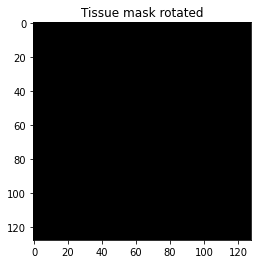

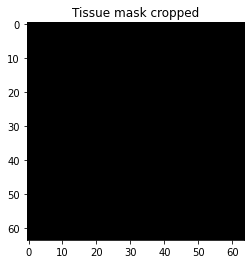

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (11312.0, 17904.0)


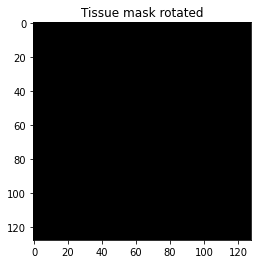

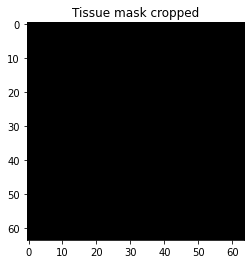

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (93088.0, 51984.0)


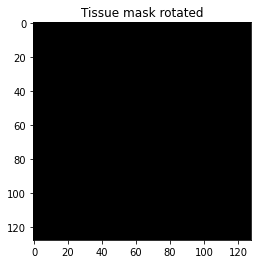

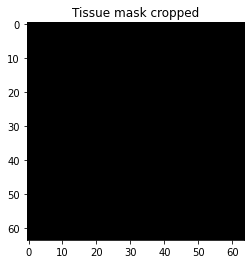

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (62656.0, 78928.0)


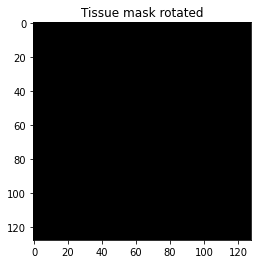

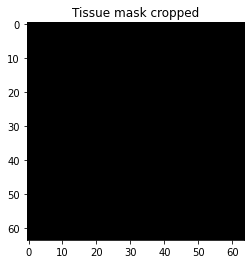

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (32656.0, 80496.0)


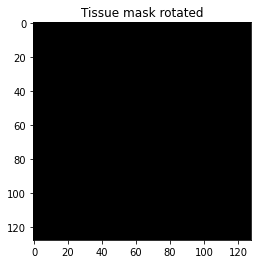

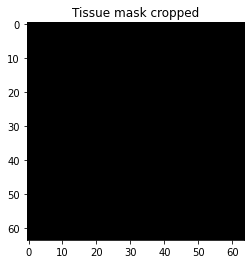

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (53680.0, 78352.0)


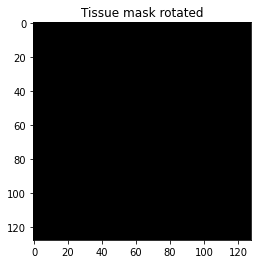

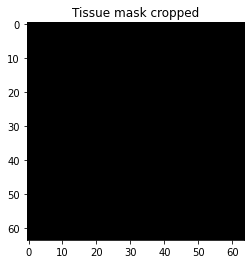

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (40512.0, 37664.0)


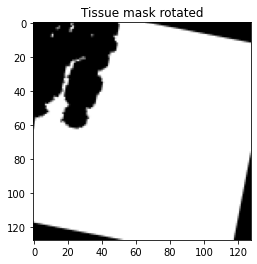

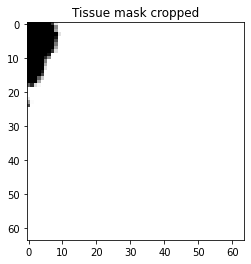

tissue ratio inside patch is less than 0.1 with value:  2.918701171875
random coordinates (x,y): (5744.0, 23744.0)


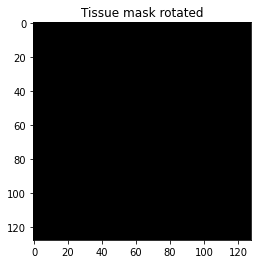

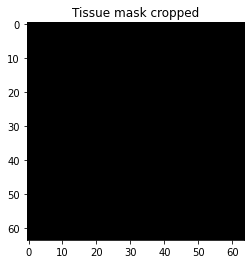

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (23968.0, 76960.0)


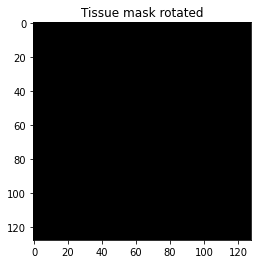

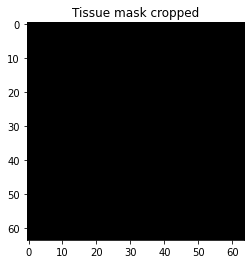

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (94992.0, 9664.0)


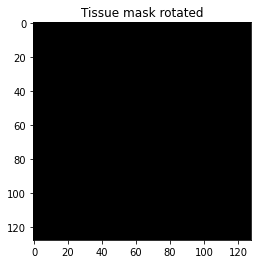

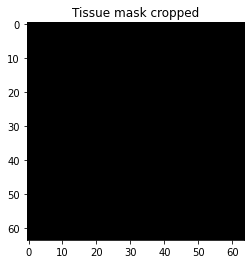

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (84096.0, 26848.0)


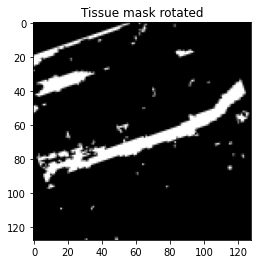

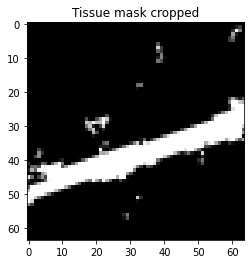

tissue ratio inside patch is over 0.1 with value:  0.49658203125
saving image in:  /content/drive/My Drive/KOHI_Pathologynon_tumor_patches/image_non_tumor/0.png


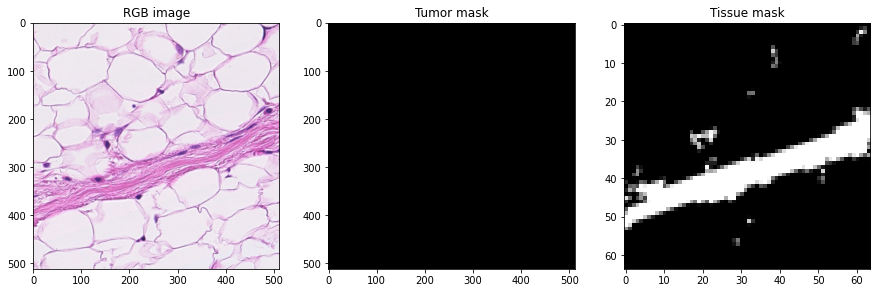

random coordinates (x,y): (117232.0, 79488.0)


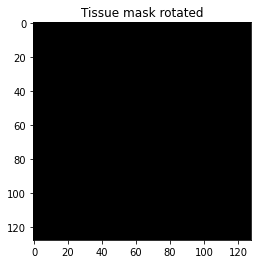

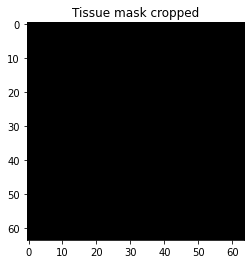

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (73424.0, 17040.0)


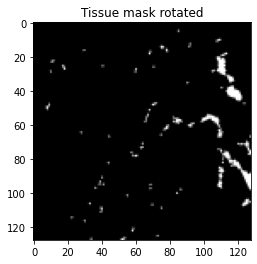

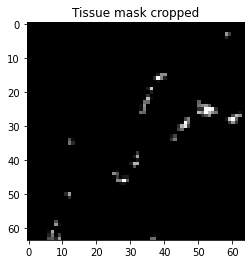

tissue ratio inside patch is less than 0.1 with value:  0.09228515625
random coordinates (x,y): (34288.0, 18448.0)


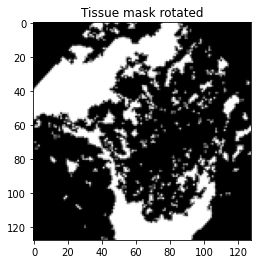

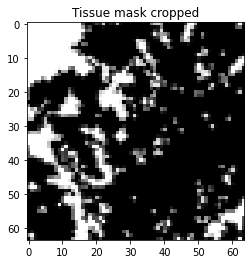

tissue ratio inside patch is over 0.1 with value:  1.14990234375
saving image in:  /content/drive/My Drive/KOHI_Pathologynon_tumor_patches/image_non_tumor/1.png


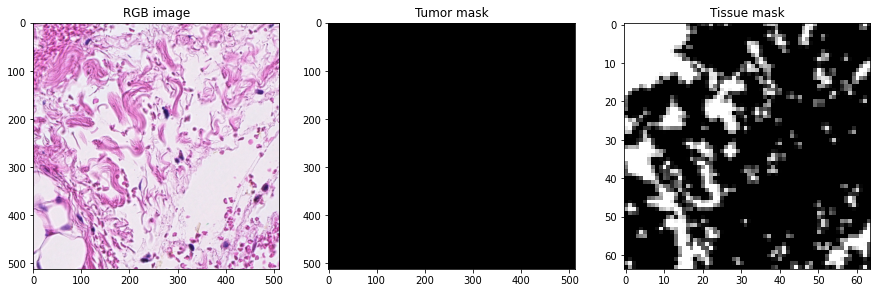

random coordinates (x,y): (51296.0, 30176.0)


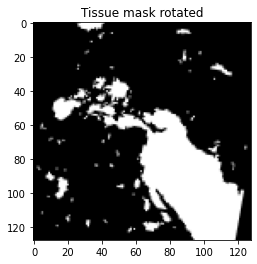

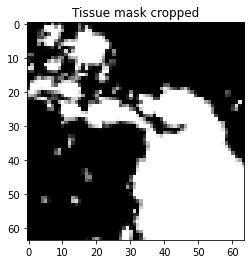

tissue ratio inside patch is over 0.1 with value:  1.389404296875
saving image in:  /content/drive/My Drive/KOHI_Pathologynon_tumor_patches/image_non_tumor/2.png


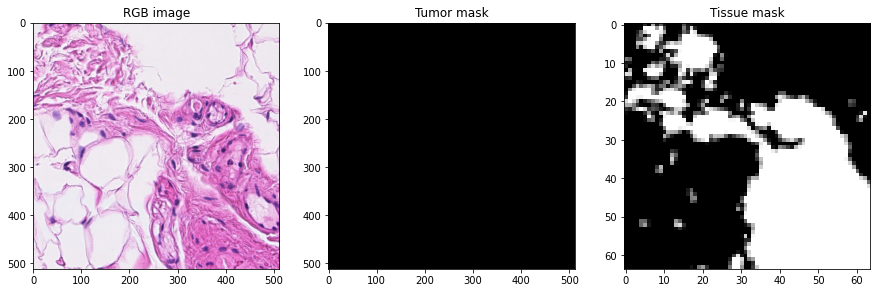

random coordinates (x,y): (54928.0, 70528.0)


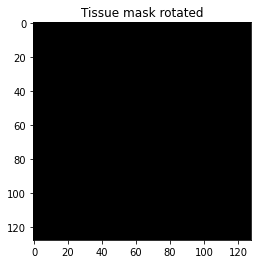

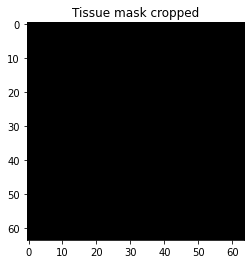

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (24064.0, 80720.0)


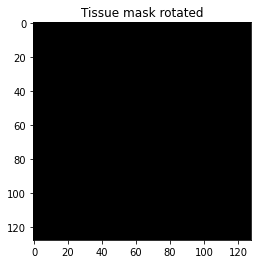

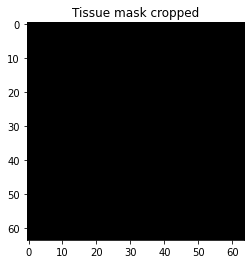

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (119328.0, 72448.0)


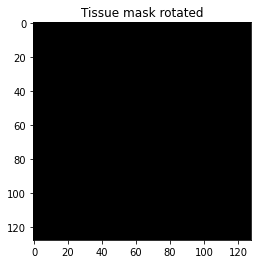

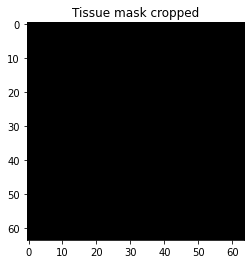

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (67568.0, 70992.0)


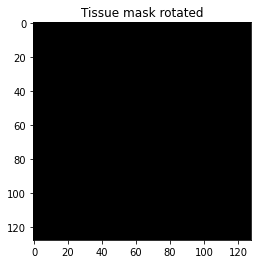

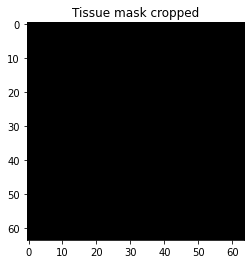

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (97216.0, 9840.0)


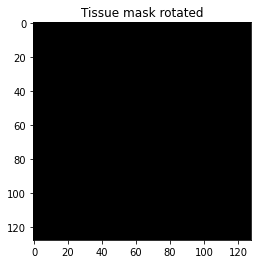

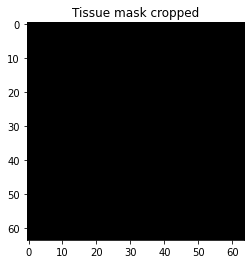

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (5424.0, 4240.0)


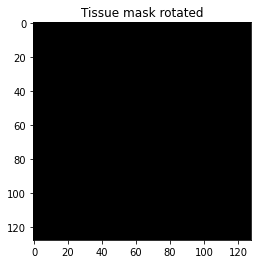

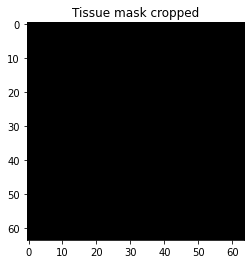

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (74304.0, 5152.0)


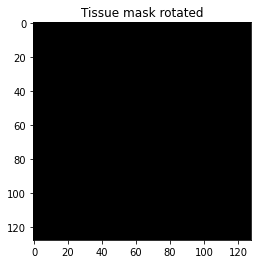

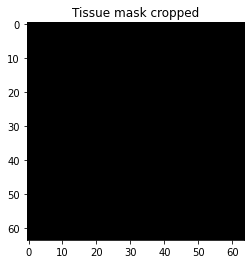

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (77728.0, 69104.0)


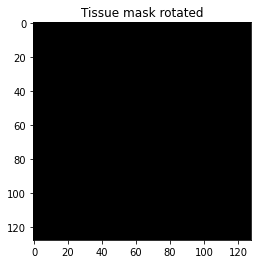

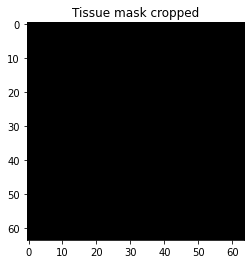

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (22224.0, 73152.0)


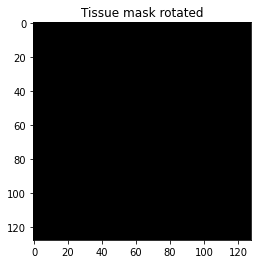

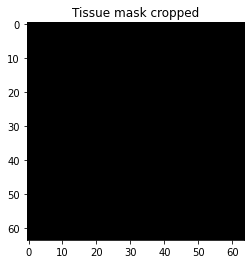

tissue ratio inside patch is less than 0.1 with value:  0
random coordinates (x,y): (49840.0, 89216.0)


In [ ]:
patch_objective = 5
patch_count = 0

while patch_count < patch_objective :
    
    rand_coord = get_rand_coord(min_x,max_x,min_y,max_y,multiple)
    print('random coordinates (x,y):', rand_coord)

    start_y_level0 = int(rand_coord[1] - (size_patch_over_level0/2))
    start_x_level0 = int(rand_coord[0] - (size_patch_over_level0/2))
    
    start_y_level4 = int(start_y_level0/multiple)
    start_x_level4 = int(start_x_level0/multiple)

    tumor_mask_patch = tumor_mask[start_y_level4:int(start_y_level4+size_patch_over_level4),
                                  start_x_level4:int(start_x_level4+size_patch_over_level4)]
    tissue_mask_patch = tissue_mask[start_y_level4:int(start_y_level4+size_patch_over_level4),
                                    start_x_level4:int(start_x_level4+size_patch_over_level4)]
    image_patch = np.array(org_slide.read_region([start_x_level0,start_y_level0],0,
                                                 [size_patch_over_level0,size_patch_over_level0]))[:,:,0:3]
    
    rand_angle = random.randint(0,360)

    try:
      tumor_mask_patch_rotated = imutils.rotate(tumor_mask_patch, rand_angle)
      tissue_mask_patch_rotated = imutils.rotate(tissue_mask_patch, rand_angle)
      image_patch_rotated = imutils.rotate(image_patch, rand_angle)

      plt.imshow(tissue_mask_patch_rotated,'gray')
      plt.title('Tissue mask rotated')
      plt.show()
        
    except:
        continue

    tumor_mask_patch_cropped = tumor_mask_patch_rotated[int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4),
                                                        int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4)]
    tissue_mask_patch_cropped = tissue_mask_patch_rotated[int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4),
                                                          int(size_patch_level4/2):int((size_patch_level4/2) + size_patch_level4)]
    image_patch_cropped = image_patch_rotated[int(size_patch_level0/2):int((size_patch_level0/2) + size_patch_level0),
                                              int(size_patch_level0/2):int((size_patch_level0/2) + size_patch_level0)]
    
    plt.imshow(tissue_mask_patch_cropped,'gray')
    plt.title('Tissue mask cropped')
    plt.show()

    
    if (get_ratio_mask(tumor_mask_patch_cropped) == 0) and (get_ratio_mask(tissue_mask_patch_cropped) > 0.1) :    
        print('tissue ratio inside patch is over 0.1 with value: ',get_ratio_mask(tissue_mask_patch_cropped))
        
        final_image_path = path_common + 'non_tumor_patches/image_non_tumor'
        final_mask_tumor_path = path_common + 'non_tumor_patches/mask_tumor'
        final_mask_tissue_path = path_common + 'non_tumor_patches/mask_tissue'


        if not os.path.exists(final_image_path):
            os.makedirs(final_image_path)
        if not os.path.exists(final_mask_tumor_path):
            os.makedirs(final_mask_tumor_path)
        if not os.path.exists(final_mask_tissue_path):
            os.makedirs(final_mask_tissue_path)

        save_image_path = final_image_path +'/'+ str(patch_count) + '.png'
        save_mask_tumor_path = final_mask_tumor_path +'/'+ str(patch_count) + '.png'
        save_mask_tissue_path = final_mask_tissue_path +'/'+ str(patch_count) + '.png'

        print('saving image in: ',save_image_path)

        resize_mask_tumor = cv2.resize(tumor_mask_patch_cropped,(512,512),cv2.INTER_NEAREST)
        resize_image = cv2.resize(image_patch_cropped,(512,512),cv2.INTER_AREA)
        resize_image_RGB = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB)
        
        # cv2.imwrite(save_image_path,resize_image_RGB)
        # cv2.imwrite(save_mask_tumor_path,resize_mask_tumor)
        # cv2.imwrite(save_mask_tissue_path,tissue_mask_patch_cropped)

        patch_count += 1

        plt.figure(figsize=(15, 15))

        plt.subplot(131)
        plt.imshow(resize_image)
        plt.title('RGB image')

        plt.subplot(132)
        plt.imshow(cv2.merge((resize_mask_tumor,resize_mask_tumor,resize_mask_tumor)),'gray')
        plt.title('Tumor mask')

        plt.subplot(133)
        plt.imshow(tissue_mask_patch_cropped,'gray')
        plt.title('Tissue mask')

        plt.show()
        
    else:
        print('tissue ratio inside patch is less than 0.1 with value: ',get_ratio_mask(tissue_mask_patch_cropped))
